In [18]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
#np.unique(y)

In [19]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

下面展示的是感知机的学习

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(n_iter=60,eta0=0.05,random_state=0)
ppn.fit(X_train_std,y_train)

y_pred = ppn.predict(X_test_std)

print('Misclassfied samples: %.2f' % accuracy_score(y_test,y_pred))

Misclassfied samples: 0.98


In [21]:
from  matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    marker = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #how many colors needed
    
    
    # plot the decision region
    
    x1_min,x1_max = X[:,0].min() -1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min() -1,X[:,0].max()+1
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    X_test,y_test = X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl,1],
                   alpha=0.8,c=cmap(idx),
                    marker=marker[idx],label=cl
                   )

    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidth=1,marker='o',
                   s=55,label='test set')
        

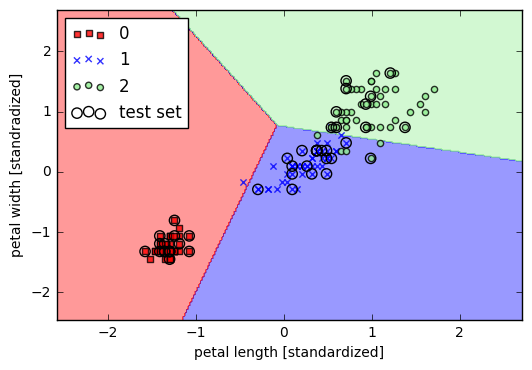

In [25]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150)
                     )
                           
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()

**接下来使用logistic回归 LR**

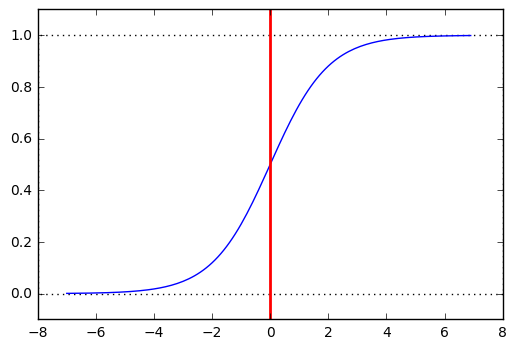

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-7,7,0.1)
y = 1.0/(1.0+np.exp(-x))
plt.plot(x,y)
#plt.axvline(x = 2.0, ymin = 0.2,ymax=0.6,color='r')
plt.axvline(x = 0.0,color='r',linewidth=2)
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.ylim(-0.1,1.1)
plt.show()

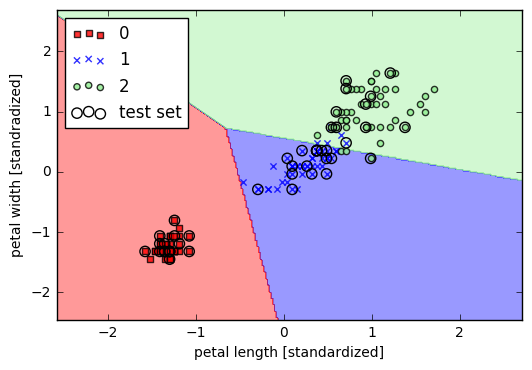

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()

接下来研究 $C=\frac{1}{\xi}$的惩罚系数的影响

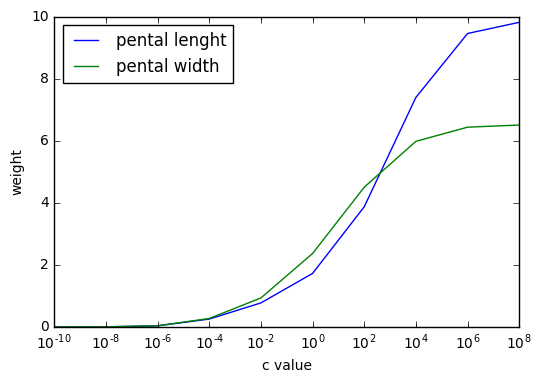

In [28]:
weights = []
xc = []
for c in np.arange(-5,5,1):
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    xc.append(100**c)
    weights.append(lr.coef_[2])
    
weights = np.array(weights)
plt.xlabel('c value')
plt.ylabel('weight')
plt.plot(xc,weights[:,0],label='pental lenght')
plt.plot(xc,weights[:,1],label='pental width')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

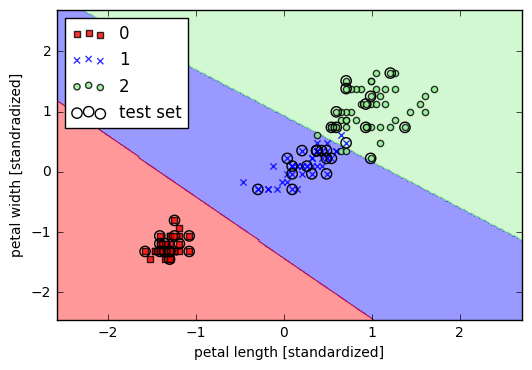

In [10]:
from sklearn.svm import SVC
lr = SVC(kernel='linear')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standradized]')
plt.legend(loc='upper left')
plt.show()

非线性svm
---

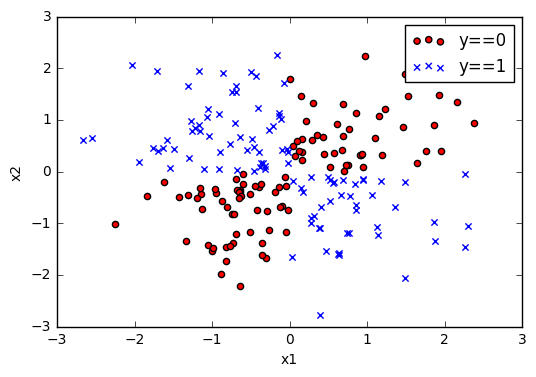

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200,2)
Y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_xor[Y_xor == 0,0],X_xor[Y_xor ==0 ,1],c='red',marker='o',label='y==0')
plt.scatter(X_xor[Y_xor == 1,0],X_xor[Y_xor ==1 ,1],c='blue',marker='x',label='y==1')
plt.ylim(-3.0)
plt.legend()
plt.show()

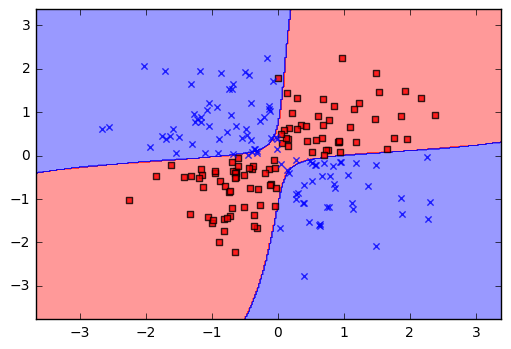

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=0, gamma=0.10, C=10.0)
svc.fit(X_xor,Y_xor)
plot_decision_regions(X_xor,Y_xor,classifier=svc)
plt.show()

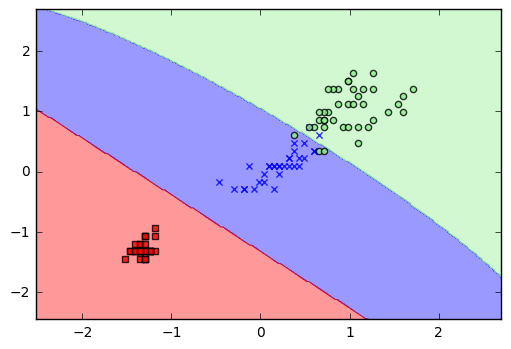

In [40]:
svc = SVC(kernel='rbf',random_state=0,gamma=0.10,C=10.0)
svc.fit(X_train_std,y_train)
plot_decision_regions(X_train_std,y_train,classifier=svc)
plt.show()

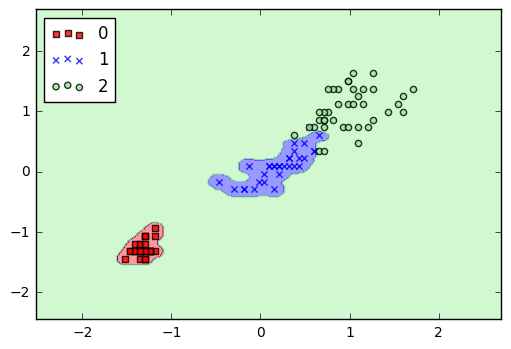

In [49]:
svc = SVC(kernel='rbf',random_state=0,gamma=100,C=10.0)
svc.fit(X_train_std,y_train)
plot_decision_regions(X_train_std,y_train,classifier=svc)
plt.legend(loc='upper left')
plt.show()

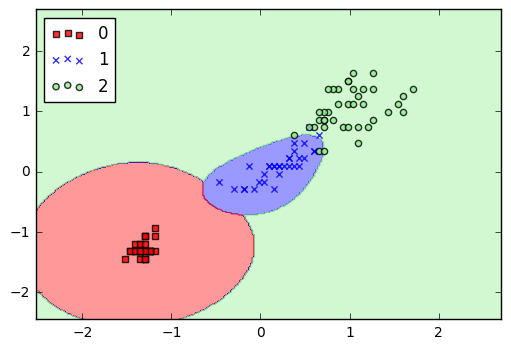

In [55]:
svc = SVC(kernel='rbf',random_state=0,gamma=1.0,C=100.0)
svc.fit(X_train_std,y_train)
plot_decision_regions(X_train_std,y_train,classifier=svc)
plt.legend(loc='upper left')
plt.show()

决策树学习
---

比较集中选择特征的算法：信息增益(C4.5增益比)、分类误差和基尼指数

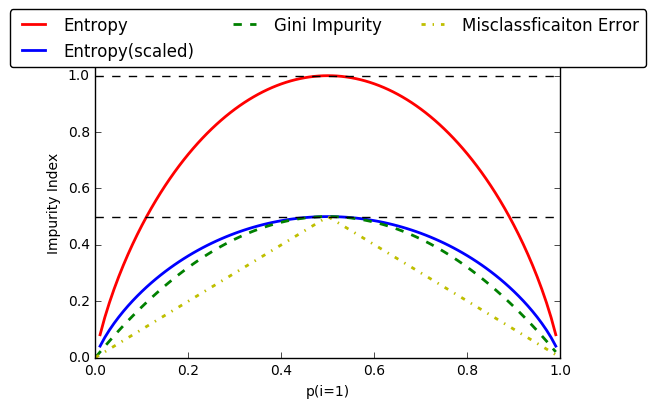

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return 2*(p)*(1-p) #考虑只有两类的情况

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x] #特别处理log(0)
sc_ent = [e*0.5 if e else None for e in ent] #entroy/2
err = [error(i) for i in x]

#fig = plt.figure()
ax = plt.subplot(111)
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],
                       ['Entropy','Entropy(scaled)','Gini Impurity','Misclassficaiton Error'],
                       ['-','-','--','-.'],
                       ['r','b','g','y']):
    line = ax.plot(x,i,label=lab,linestyle=ls,color=c,lw=2)
    
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

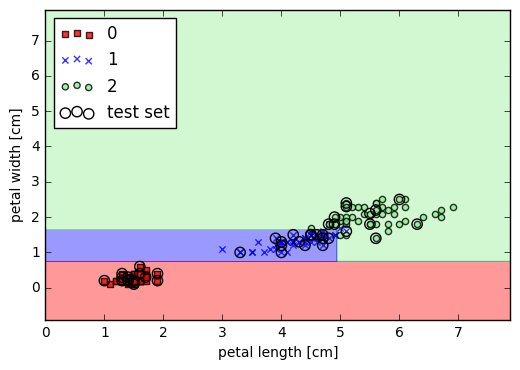

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
tree.fit(X_train,y_train) #注意这里没有scaling
X_combined = np.vstack([X_train,X_test])
y_combined = np.hstack([y_train,y_test])
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()


In [71]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',feature_names=['petal length','petal width'])

![tree.png](tree.png)

使用随机森林来预测
---

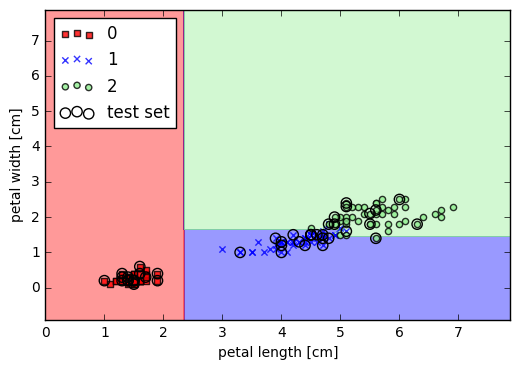

In [78]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=5,
                               random_state=1,n_jobs=2)

forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()


**KNN**

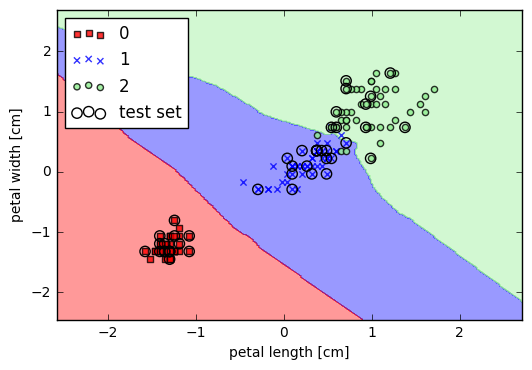

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()